# Universidad Central de Venezuela
## Facultad de Ciencias
### Escuela de Computación

**Minería de datos**
*Período  1-2024*

## Asignacion 1Ñ


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import gaussian_kde

# Lee el archivo CSV
df = pd.read_csv('medical_students_dataset.csv')

# Muestra las primeras 10  filas del DataFrame en modo tabla
print("Primeras filas del DataFrame:")
display(df.head(10))

#Evalua cuantos registros tiene el dataset en un inicio
num_registros = df.shape[0]
print(f"El dataset tiene {num_registros} registros inicialmente")

#Nota: fue necesario instalar la libreria scikit-learn para poder uar el sklear.preprocesing

Primeras filas del DataFrame:


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
5,6.0,32.0,NaN,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
6,7.0,21.0,NaN,172.949704,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No
7,8.0,28.0,Male,186.489402,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No
8,9.0,21.0,Male,155.039678,42.958703,B,NaN,98.808053,NaN,111.0,243.0,No,No
9,10.0,32.0,NaN,170.836315,50.783250,B,17.400435,98.570168,61.0,94.0,166.0,NaN,No


El dataset tiene 200000 registros inicialmente


In [59]:
# Renombrar la columna Height a Height_Meters con el fin de que sea un descriptor completo, que indique la unidad en la que esta expresada la variable
# Tambien se divide los valores por 100 para convertir la altura de centímetros a metros y asi poder calcular
# de manera directa el BMI
df.rename(columns={'Height': 'Height_Meters'}, inplace=True)
df['Height_Meters'] = df['Height_Meters'] / 100

#Muestra las primeras 10  filas del DataFrame actualizado en modo tabla
print("\nDatos actualizados con BMI calculado:")
display(df.head(10))


Datos actualizados con BMI calculado:


,Student ID,Age,Gender,Height_Meters,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,1.617779,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,1.520692,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,1.825377,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,1.821129,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
5,6.0,32.0,NaN,1.514913,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
6,7.0,21.0,NaN,1.729497,48.102744,AB,16.081635,97.715469,66.0,134.0,247.0,No,No
7,8.0,28.0,Male,1.864894,52.389752,AB,15.063921,98.227788,85.0,123.0,128.0,No,No
8,9.0,21.0,Male,1.550397,42.958703,B,NaN,98.808053,NaN,111.0,243.0,No,No
9,10.0,32.0,NaN,1.708363,50.783250,B,17.400435,98.570168,61.0,94.0,166.0,NaN,No


In [60]:
# Se calcula el BMI para los campos vacios del mismo a partir del peso y la altura. Esto se hace ya que estos campos vacios representan
# un problema funcional

# Calcular BMI utilizando la fórmula: BMI = Weight / (Height_Meters ** 2)
df['BMI'] = df.apply(lambda row: row['Weight'] / (row['Height_Meters'] ** 2) if pd.notna(row['Height_Meters']) and pd.notna(row['Weight']) else row['BMI'], axis=1)

#Los estudiantes que no tienen BMI y no es calculable porque falta la altura o el peso, se eliminan del dataset ya que ese dato es sumamente importante
# cuando de estudios medicos se trata y hacer un analisis sin dicho dato no resulta prudente

# Eliminacion de filas donde 'BMI' es NaN (queda  como NaN los que no fue posible calcular en la iteracion pasada)
df.dropna(subset=['BMI'], inplace=True)

#En datos de salud como los que se estan considerando en este dataset la altura y el peso quedan en un segundo plano, sirve de referencia 
# principal el BMI(indice de masa corporal) calculado a partir de estos, por lo tanto se considera oportuno eliminar estas variables
# con el fin de disminuir la dimencionalidad (requerimiento funcional)

# Eliminar la columna 'Height_Meters' para reducir la dimensionalidad por seleccion
df.drop(columns=['Height_Meters'], inplace=True)

# Eliminar la columna 'Weight' para reducir la dimensionalidad por seleccion
df.drop(columns=['Weight'], inplace=True)

#Asi mismo eliminaremos la columan Student ID ya que no aporta informacion valiosa en el analisis, se trata solo del identificador
#proveniente de la base de datos donde se registro la informacion inicialmente.'=

# Eliminar la columna 'Student ID' para reducir la dimensionalidad por seleccion
df.drop(columns=['Student ID'], inplace=True)

# Muestra el DataFrame actualizado
display(df.head(15))

,Age,Gender,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,Female,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,NaN,Male,B,20.597139,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
5,32.0,NaN,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
6,21.0,NaN,AB,16.081635,97.715469,66.0,134.0,247.0,No,No
7,28.0,Male,AB,15.063921,98.227788,85.0,123.0,128.0,No,No
8,21.0,Male,B,17.871682,98.808053,NaN,111.0,243.0,No,No
9,32.0,NaN,B,17.400435,98.570168,61.0,94.0,166.0,NaN,No
10,28.0,Female,B,31.440000,98.371843,60.0,NaN,241.0,No,Yes


In [61]:
# Observando la columna de Blood type es prudente codificar la misma para una mayor eficiencia en los analisis. (requerimiento funcional)

# Primero, rellenamos los valores nulos en la columna 'Blood Type' con 'unknown', esto debido a que se quiere codificar, por lo que primero
# se tienen que insertar los valores faltantes, al no ser un dato que se pueda asumir o promediar por ser categorico y ademas tratarse de un tipo
# de sangre, resulta prudente hacer esta sustitucion.
df['Blood Type'].fillna('unknown', inplace=True)


# Se crea una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajusta y transforma la columna 'Blood Type' usando LabelEncoder
df['Blood Type'] = label_encoder.fit_transform(df['Blood Type'])

#LabelEncoder asigna a cada tipo de sangre un número único basado en el orden alfabético o en el orden de aparición de los tipos de sangre en los datos.
# Luego, Cada tipo de sangre se sustituye por su correspondiente valor numérico. y finalmente estos valores ya actualizados se guardan nuevamente
# en la columna del blood type. Otra opcion seria eliminar las ocurrencias (filas) con estos valores desconcidos pero si aplicamos este criterio en varias variables 
# donde ocurre lo mismo, podriamos causar una desviacion considerable en los resultados obtenidos en el analisis debido a una reduccion con sesgo.
# Adicionalmente puede resultar de utilidad en el proceso de mineria de datos conocer de cuantas personas se desconoce el tipo de sangre

# Muestra el DataFrame actualizado
display(df.head(10))



C:\Users\joine\AppData\Local\Temp\ipykernel_42632\2094645258.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Blood Type'].fillna('unknown', inplace=True)


,Age,Gender,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,Female,3,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,NaN,Male,2,20.597139,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,0,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,2,19.096042,98.839605,99.0,112.0,141.0,No,Yes
5,32.0,NaN,2,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
6,21.0,NaN,1,16.081635,97.715469,66.0,134.0,247.0,No,No
7,28.0,Male,1,15.063921,98.227788,85.0,123.0,128.0,No,No
8,21.0,Male,2,17.871682,98.808053,NaN,111.0,243.0,No,No
9,32.0,NaN,2,17.400435,98.570168,61.0,94.0,166.0,NaN,No
10,28.0,Female,2,31.440000,98.371843,60.0,NaN,241.0,No,Yes


In [62]:
# Se desea insertar os valores faltantes en heart rate y blood pressure (requerimiento funcional). En este caso conocemos que estos valores pueden variar segun la 
# edad, el BMI y otros aspectos, por lo que resulta importante no solo insertar valores promedio, sino valores promedio basado en valores similares
# para otras variables, es decir por agrupacion.
 
# Convertir valores no numéricos a NaN en la columna 'Heart Rate'
df['Heart Rate'] = pd.to_numeric(df['Heart Rate'], errors='coerce')

# Calcular la mediana del 'Heart Rate' agrupado por 'Age', 'BMI' y 'Blood Pressure'
median_heart_rate = df.groupby(['Age', 'BMI', 'Blood Pressure'])['Heart Rate'].median()

# Función para imputar valores faltantes en 'Heart Rate' basados en la mediana condicional
def impute_heart_rate(row):
    if pd.isnull(row['Heart Rate']):
        try:
            return median_heart_rate.loc[(row['Age'], row['BMI'], row['Blood Pressure'])]
        except KeyError:
            return np.nan
    else:
        return row['Heart Rate']

# Aplicar la función 'impute_heart_rate' a cada fila del DataFrame
df['Heart Rate'] = df.apply(impute_heart_rate, axis=1)
# Muestra el DataFrame actualizado


# Calcular la mediana de 'Blood Pressure' agrupada por 'Age' y 'BMI'
median_blood_pressure = df.groupby(['Age', 'BMI'])['Blood Pressure'].median()

# Función para imputar valores faltantes en 'Blood Pressure'
def impute_blood_pressure(row):
    if pd.isnull(row['Blood Pressure']):
        try:
            return median_blood_pressure.loc[(row['Age'], row['BMI'])]
        except KeyError:
            return np.nan
    else:
        return row['Blood Pressure']

# Aplicar la función para imputar valores faltantes en 'Blood Pressure'
df['Blood Pressure'] = df.apply(impute_blood_pressure, axis=1)


# Eliminar filas donde 'Blood Pressure' es NaN luego de promediar por agrupacion
df.dropna(subset=['Blood Pressure'], inplace=True)


display(df.head(15))

,Age,Gender,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,Female,3,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,NaN,Male,2,20.597139,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,0,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,2,19.096042,98.839605,99.0,112.0,141.0,No,Yes
5,32.0,NaN,2,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
6,21.0,NaN,1,16.081635,97.715469,66.0,134.0,247.0,No,No
7,28.0,Male,1,15.063921,98.227788,85.0,123.0,128.0,No,No
8,21.0,Male,2,17.871682,98.808053,84.0,111.0,243.0,No,No
9,32.0,NaN,2,17.400435,98.570168,61.0,94.0,166.0,NaN,No
11,34.0,Female,1,22.950992,98.118274,86.0,97.0,247.0,No,No


In [63]:
# Se desea insertar los valores faltantes en temperatura (requerimiento funcional), esto lo haremos con el promedio de la misma

# Calcular el promedio de 'Temperature'
average_temperature = df['Temperature'].mean()

# Función para imputar valores faltantes en 'Temperature'
def impute_temperature(row):
    if pd.isnull(row['Temperature']):
        return average_temperature
    else:
        return row['Temperature']

# Aplicar la función para imputar valores faltantes en 'Temperature'
df['Temperature'] = df.apply(impute_temperature, axis=1)

# Muestra el DataFrame actualizado
display(df.head(15))



,Age,Gender,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,Female,3,27.645835,98.601079,95.0,109.0,203.0,No,NaN
1,NaN,Male,2,20.597139,98.714977,93.0,104.0,163.0,No,No
2,32.0,Female,0,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,30.0,Male,2,19.096042,98.839605,99.0,112.0,141.0,No,Yes
5,32.0,NaN,2,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
6,21.0,NaN,1,16.081635,97.715469,66.0,134.0,247.0,No,No
7,28.0,Male,1,15.063921,98.227788,85.0,123.0,128.0,No,No
8,21.0,Male,2,17.871682,98.808053,84.0,111.0,243.0,No,No
9,32.0,NaN,2,17.400435,98.570168,61.0,94.0,166.0,NaN,No
11,34.0,Female,1,22.950992,98.118274,86.0,97.0,247.0,No,No


In [64]:
# En el caso del genero, el indicador de diabetes y de si es fumador, se considero binarizar esta variable (requerimiento funcional), sin embargo, ante la presencia de valores 
# faltantes se opto por manter el registro de los mismos comomtal, ya que puede ser importante concoer la cantidad de personas de las que por ejemplo 
# no se sabe si fuman o si tienen diabetes. Basado en este se aplico fue una codificacion de los datos categoricos.

# Manejo de casos desconocidos (NaN o None) como una categoría 'Unknown'
df['Gender'] = df['Gender'].fillna('Unknown')

# Usando LabelEncoder para binarizar 'Gender' con manejo explícito de 'Unknown'
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Manejo de casos desconocidos (NaN o None) como una categoría 'Unknown' para 'Diabetes'
df['Diabetes'] = df['Diabetes'].fillna('Unknown')

# Usando LabelEncoder para binarizar 'Diabetes' con manejo explícito de 'Unknown'
label_encoder = LabelEncoder()
df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'])

# Manejo de casos desconocidos (NaN o None) como una categoría 'Unknown' para 'Smoking'
df['Smoking'] = df['Smoking'].fillna('Unknown')

# Usando LabelEncoder para binarizar 'Smoking' con manejo explícito de 'Unknown'
df['Smoking'] = label_encoder.fit_transform(df['Smoking'])


# Muestra el DataFrame actualizado
display(df.head(15))

,Age,Gender,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,0,3,27.645835,98.601079,95.0,109.0,203.0,0,1
1,NaN,1,2,20.597139,98.714977,93.0,104.0,163.0,0,0
2,32.0,0,0,16.729017,98.260293,76.0,130.0,216.0,2,0
3,30.0,1,2,19.096042,98.839605,99.0,112.0,141.0,0,2
5,32.0,2,2,29.912403,99.668373,70.0,128.0,183.0,1,2
6,21.0,2,1,16.081635,97.715469,66.0,134.0,247.0,0,0
7,28.0,1,1,15.063921,98.227788,85.0,123.0,128.0,0,0
8,21.0,1,2,17.871682,98.808053,84.0,111.0,243.0,0,0
9,32.0,2,2,17.400435,98.570168,61.0,94.0,166.0,1,0
11,34.0,0,1,22.950992,98.118274,86.0,97.0,247.0,0,0


In [65]:
# Eliminar registros con valores nulos en la columna 'Age', ya que esta es una variable cuyo valor no se puede estimar y
# los registros sin edad representan entonces un problema funcional en el momento del analisis
df.dropna(subset=['Age'], inplace=True)

# Muestra el DataFrame actualizado
display(df.head(15))

,Age,Gender,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,18.0,0,3,27.645835,98.601079,95.0,109.0,203.0,0,1
2,32.0,0,0,16.729017,98.260293,76.0,130.0,216.0,2,0
3,30.0,1,2,19.096042,98.839605,99.0,112.0,141.0,0,2
5,32.0,2,2,29.912403,99.668373,70.0,128.0,183.0,1,2
6,21.0,2,1,16.081635,97.715469,66.0,134.0,247.0,0,0
7,28.0,1,1,15.063921,98.227788,85.0,123.0,128.0,0,0
8,21.0,1,2,17.871682,98.808053,84.0,111.0,243.0,0,0
9,32.0,2,2,17.400435,98.570168,61.0,94.0,166.0,1,0
11,34.0,0,1,22.950992,98.118274,86.0,97.0,247.0,0,0
12,29.0,1,1,17.023963,98.515927,62.0,112.0,246.0,1,2


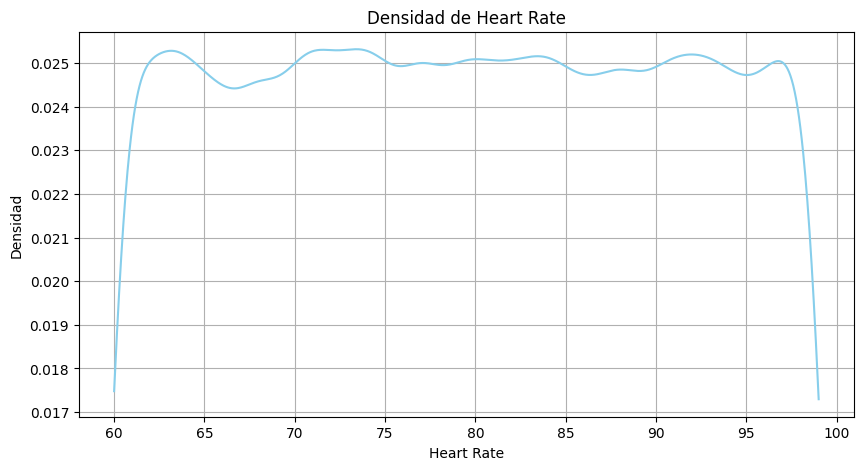

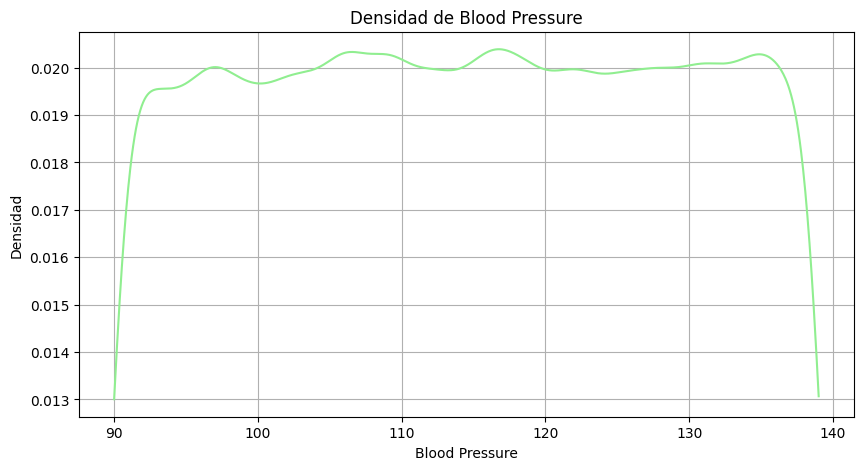

In [66]:
##Evaluemos la forma de la grafica de las variables para determinar si siguen una distribucion normal, si tienen forma de campana gaussiana


# Gráfico de densidad para 'Heart Rate'
plt.figure(figsize=(10, 5))
heart_rate_data = df['Heart Rate'].dropna()
kde_hr = gaussian_kde(heart_rate_data)
x_hr = np.linspace(min(heart_rate_data), max(heart_rate_data), 1000)
plt.plot(x_hr, kde_hr(x_hr), color='skyblue')
plt.title('Densidad de Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

# Gráfico de densidad para 'Blood Pressure'
plt.figure(figsize=(10, 5))
blood_pressure_data = df['Blood Pressure'].dropna()
kde_bp = gaussian_kde(blood_pressure_data)
x_bp = np.linspace(min(blood_pressure_data), max(blood_pressure_data), 1000)
plt.plot(x_bp, kde_bp(x_bp), color='lightgreen')
plt.title('Densidad de Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

A pesar de que la variable en la grafica no tiene forma gaussiana, no se considero prudente normalizar las variables numericas presentes en el dataset porque al tratarse de datos medicos puede resultar de mayor utilidad tener los valores expresados en los rangos comunes en el area.

In [67]:
num_registros = df.shape[0]
print(f"El dataset tiene {num_registros} registros después de todas las operaciones.")

El dataset tiene 171602 registros después de todas las operaciones.


El dataset paso de tener 200.000 registros a tener 170.000 despues de las eliminaciones de registros a los que le faltaban datos de suma importancia, podemos ver que si bien se redujo el tamaño de la muestra, solo disminuyo en un 15%. Luego de todas las operaciones de preprocesamiento aplicadas el dataset quedo en un estado consistente. 